Name: Yuvan Bharathi

Subject: Neural Networks and Neuroinformatics

Project Title: Cardiac_Arrest_Problem_Detection

Contents:
  

## 1. **Importing Essential Libraries**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns



# **2. Importing our dataset**

In [91]:
dp = pd.read_csv('heart_disease_data.csv')

# **3. Data Exploration**

In [92]:
dp.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [93]:
dp.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [94]:
dp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'old_peak', 'st_slope','target']

In [95]:
dp['chest_pain_type'].value_counts()

4    625
3    283
2    216
1     66
Name: chest_pain_type, dtype: int64

In [96]:
dp['rest_ecg'].value_counts()

0    684
2    325
1    181
Name: rest_ecg, dtype: int64

In [97]:
dp['st_slope'].value_counts()

2    582
1    526
3     81
0      1
Name: st_slope, dtype: int64

# **4. Clearing data**

In [98]:
dp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'old_peak', 'st_slope','target']

In [99]:
dp
dp.drop(dp[dp.st_slope==0].index, inplace=True)

In [100]:
dp['st_slope'].value_counts()

2    582
1    526
3     81
Name: st_slope, dtype: int64

In [101]:
dp.isna()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,target
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,False,False,False,False,False,False,False,False,False,False,False,False
1186,False,False,False,False,False,False,False,False,False,False,False,False
1187,False,False,False,False,False,False,False,False,False,False,False,False
1188,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
dp.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
old_peak                   0
st_slope                   0
target                     0
dtype: int64

In [103]:
dp.dropna()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# **5.Importing Required library algorithms**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **6.Analysing data**

In [105]:
dp.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,0.763667,3.232969,132.138772,210.376787,0.212784,0.698907,139.739277,0.387721,0.923549,1.625736,0.528175
std,9.352961,0.425008,0.935850,18.369251,101.462185,0.409448,0.870489,25.527386,0.487435,1.086464,0.608893,0.499416
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


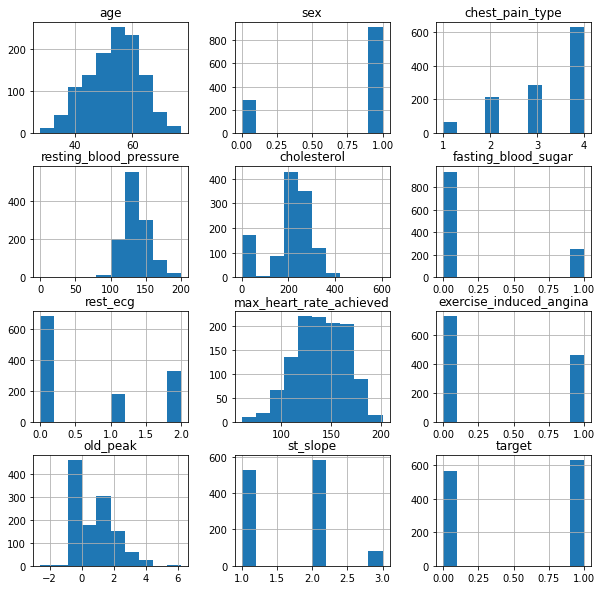

In [106]:
rcParams['figure.figsize'] = 10,10
dp.hist();

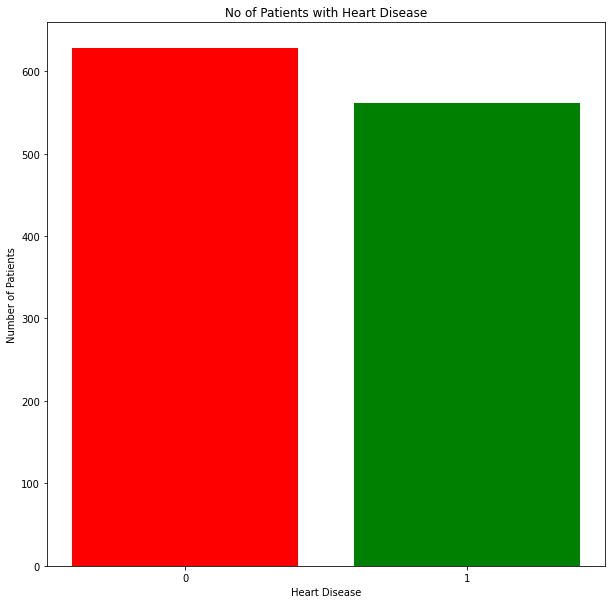

In [107]:
plt.bar(dp['target'].unique(), dp['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.title('No of Patients with Heart Disease');

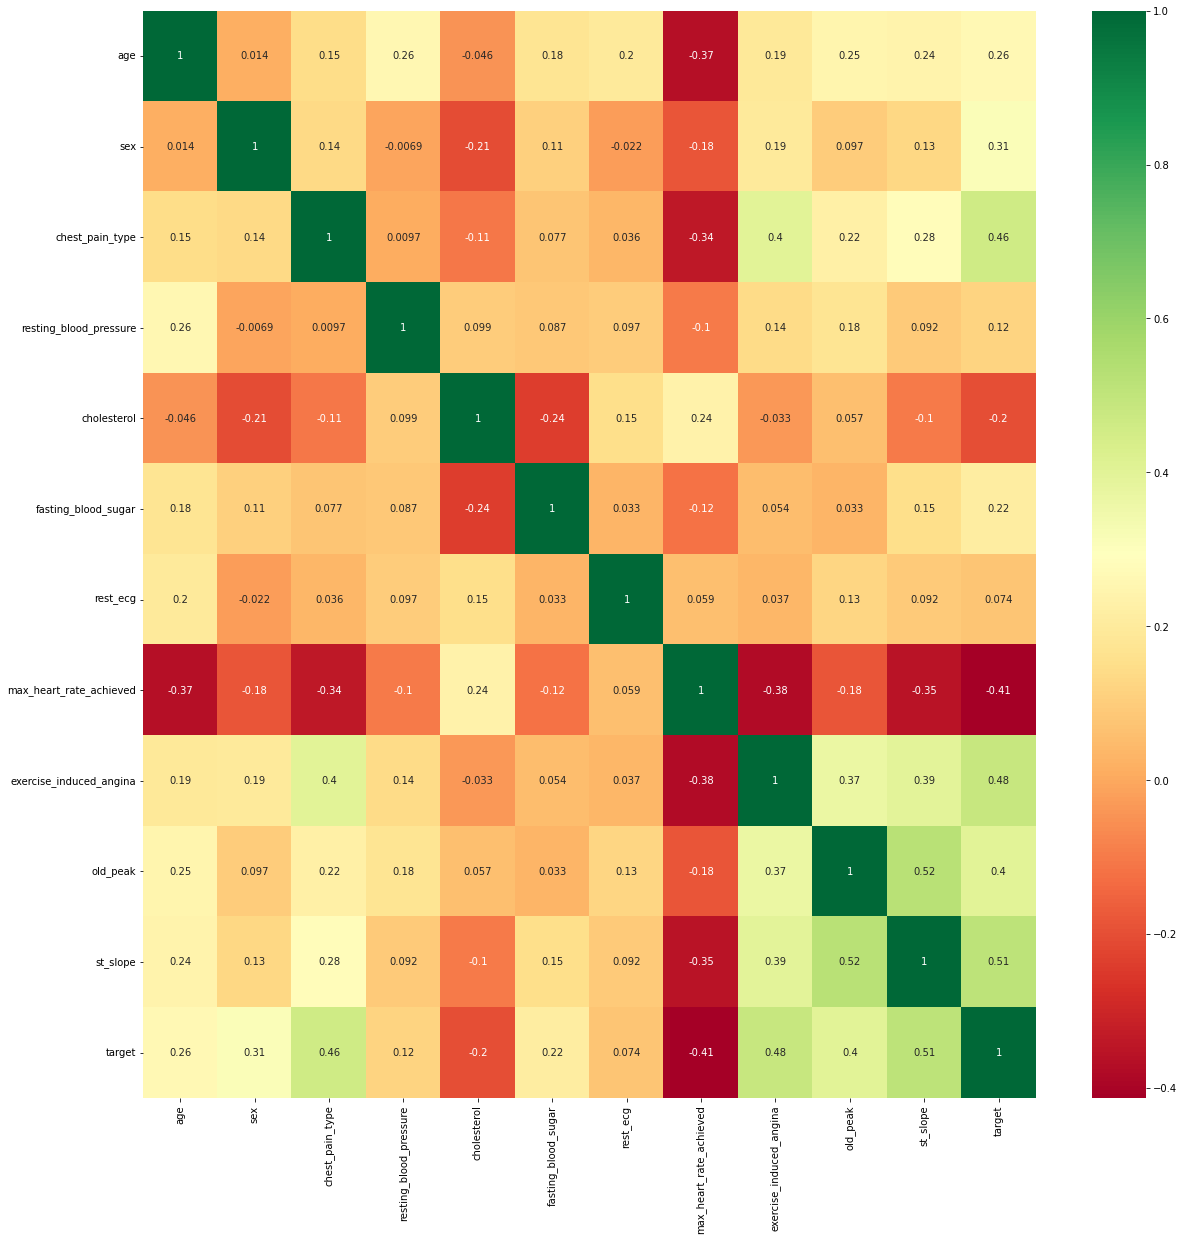

In [108]:
rcParams['figure.figsize'] = 20,20
corrmat = dp.corr()
Corrmat = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dp[Corrmat].corr(),annot=True,cmap="RdYlGn");


**Cleaning data and defining x and y**

In [109]:
X = dp.drop(['target'], axis = 1)

In [110]:
y = dp['target']


**Plotting Comparing Data** 

In [111]:
dp.sex.value_counts()

1    908
0    281
Name: sex, dtype: int64

In [112]:
Sex_Compare=pd.crosstab(dp.target,dp.sex)
Sex_Compare

sex,0,1
target,,
0,211,350
1,70,558


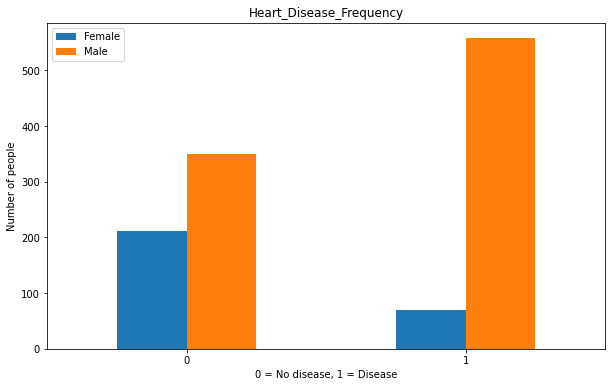

In [113]:
Sex_Compare.plot(kind='bar',figsize=(10,6));
plt.title('Heart_Disease_Frequency')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Number of people')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [114]:
dp.max_heart_rate_achieved.value_counts()

150    49
140    46
120    39
130    36
160    35
       ..
91      1
83      1
87      1
107     1
60      1
Name: max_heart_rate_achieved, Length: 119, dtype: int64

In [115]:
Heart_Rate_Target=dp.max_heart_rate_achieved[dp.target==1]

In [116]:
Age_Target=dp.age[dp.target==1]

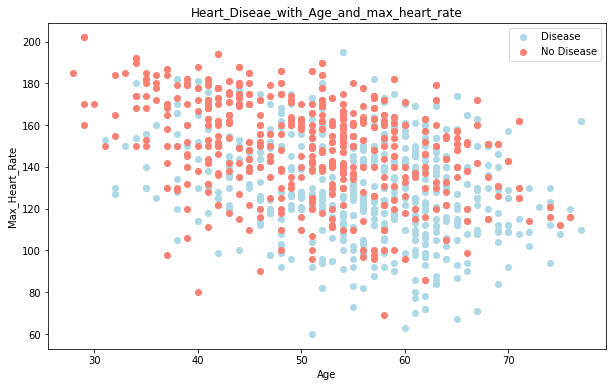

In [117]:
plt.figure(figsize=(10,6))
plt.scatter(Age_Target,Heart_Rate_Target,c='lightblue')
plt.scatter(dp.age[dp.target==0],dp.max_heart_rate_achieved[dp.target==0],c='salmon')
plt.title('Heart_Diseae_with_Age_and_max_heart_rate')
plt.xlabel('Age')
plt.ylabel('Max_Heart_Rate');
plt.legend(['Disease', 'No Disease']);


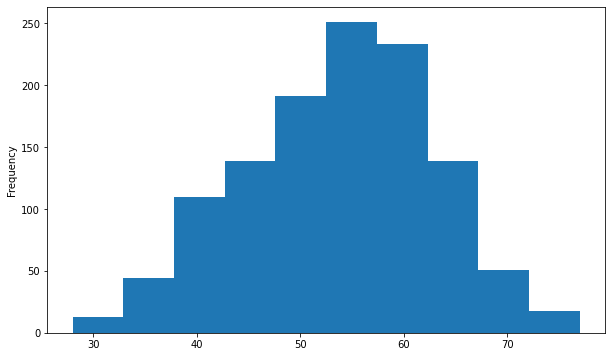

In [118]:
plt.figure(figsize=(10,6))
dp.age.plot.hist();

In [119]:
pd.crosstab(dp.chest_pain_type,dp.target)

target,0,1
chest_pain_type,,
1,41,25
2,185,31
3,193,89
4,142,483


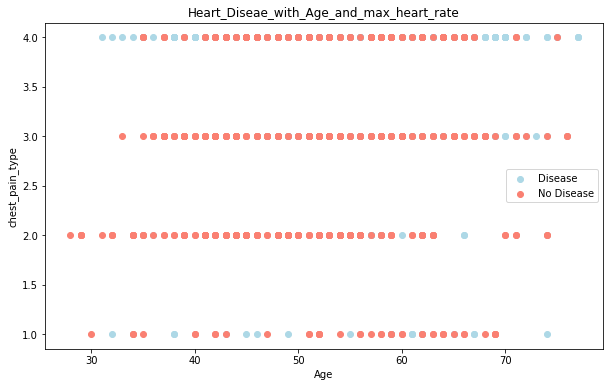

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(dp.age[dp.target==1],dp.chest_pain_type[dp.target==1],c='lightblue')
plt.scatter(dp.age[dp.target==0],dp.chest_pain_type[dp.target==0],c='salmon')
plt.title('Heart_Diseae_with_Age_and_max_heart_rate')
plt.xlabel('Age')
plt.ylabel('chest_pain_type');
plt.legend(['Disease', 'No Disease']);

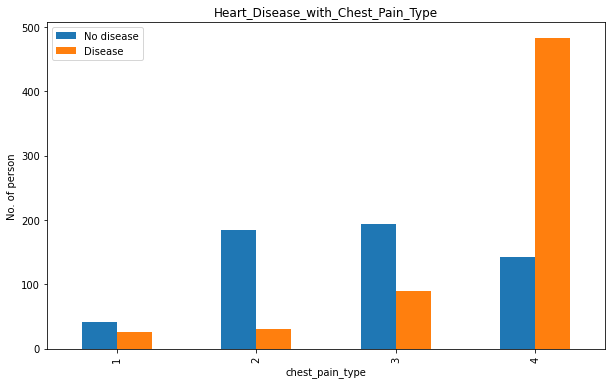

In [121]:
pd.crosstab(dp.chest_pain_type,dp.target).plot(kind='bar',figsize=(10,6));
plt.legend(['No disease', 'Disease'])
plt.ylabel('No. of person')
plt.title('Heart_Disease_with_Chest_Pain_Type');

# **7.Testing and Training data**

In [122]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.1)

In [123]:
X_train

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope
231,37,1,4,130,315,0,0,158,0,0.0,1
451,52,1,3,122,0,0,0,110,1,2.0,3
210,54,1,4,125,216,0,0,140,0,0.0,2
140,52,1,4,160,331,0,0,94,1,2.5,2
394,38,1,4,150,0,1,0,120,1,0.7,2
...,...,...,...,...,...,...,...,...,...,...,...
1045,60,1,4,140,293,0,2,170,0,1.2,2
1096,62,0,4,150,244,0,0,154,1,1.4,2
1131,60,0,3,120,178,1,0,96,0,0.0,1
861,51,0,3,140,308,0,2,142,0,1.5,1


In [124]:
X_test

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope
319,61,1,4,130,0,1,0,77,0,2.5,2
1158,66,1,4,160,228,0,2,138,0,2.3,1
908,58,0,1,150,283,1,2,162,0,1.0,1
86,65,1,4,170,263,1,0,112,1,2.0,2
937,41,0,2,105,198,0,0,168,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
332,56,1,4,115,0,1,1,82,0,-1.0,1
51,47,0,4,120,205,0,0,98,1,2.0,2
1181,63,0,4,124,197,0,0,136,1,0.0,2
1121,54,0,3,160,201,0,0,163,0,0.0,1


In [125]:
Y_train

231     0
451     1
210     1
140     1
394     1
       ..
1045    1
1096    1
1131    0
861     0
1127    0
Name: target, Length: 1070, dtype: int64

In [126]:
Y_test

319     1
1158    0
908     0
86      1
937     0
       ..
332     1
51      1
1181    1
1121    0
728     0
Name: target, Length: 119, dtype: int64

## **Testing the data:**

## **Logistic Regression Algorithm:**

In [127]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [128]:
Y_pred_lr.shape

(119,)

In [129]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 87.39 %


## **Gaussian Navie Bayes Algorithm:**

In [130]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [131]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.55 %


## **Support Vector Machine Algorithm:**

In [ ]:

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

## **K Neighbors Algorithm:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

## **Decision Tree Algorithm:**

In [ ]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

## **Random Forest Classifier Algorithm:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest Classifier is: "+str(score_rf)+" %")

# **XG Boost Algorithm**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

## **Results:**

Comparing the accuracy results obtained:

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector","K-Nearest Neighbors","Decision Tree","Random Forest","XG Boost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: ",scores[i],"%")

Plotting the obtained result:

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(algorithms,scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score");


**Conclusion:**
  
  So from the above graph comparison, we came to know that Random Forest Classifier gives the maximum accuracy.